In [1]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from labellines import *
import re
from matplotlib.ticker import MultipleLocator
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/l7/r0rjx3_15fq7rrl6h9w8mnrw0000gn/T/ipykernel_95590/777804233.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif', weight='bold')
plt.rc('text', usetex=True)
fs=28
params = {'legend.fontsize': fs,
          'axes.labelsize': fs,
          'font.weight': 'bold',
          'axes.labelweight': 'bold',
          'xtick.labelsize': 0.7*fs,
          'ytick.labelsize': 0.7*fs}
plt.rcParams.update(params)
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.edgecolor': 'black',  # Dark gray for axes borders
    'xtick.color': 'black',     # Dark gray for x-tick labels
    'ytick.color': 'black',     # Dark gray for y-tick labels
    'axes.labelcolor': 'black', # Dark gray for axes labels
    'text.color': 'black',      # Dark gray for text
    'axes.titlecolor': 'black', # Dark gray for title
    'axes.linewidth': 1.5,        # Thicker axes borders
    'xtick.major.width': 1.0,     # Thicker major x-ticks
    'ytick.major.width': 1.0,     # Thicker major y-ticks
    'xtick.minor.width': 1,     # Thicker minor x-ticks
    'ytick.minor.width': 1      # Thicker minor y-ticks
})

In [6]:
# pull files and sort them by model variation

model_files = os.listdir('data')

# holds metadata like stuff for models
with open('modelVariations.json') as f:
    variations = json.load(f)

model_sort = {}
for path in model_files:
    model_name = re.sub(r'^rates_|_[^_]+$', '', path.split("/")[-1].replace("f_sn1", ""))
    if model_name in variations:
        model_sort[variations[model_name]['short']] = path

rates = [model_sort[key] for key in sorted(model_sort)]

In [16]:
def plot_f_SN1(rates, ax):
    
    model_labels = []
    model_xlabels = []
    model_xlabels_long = []

    f_sn1_values = []

    for model in rates:
        df = pd.read_csv("data/"+model, index_col=0)
        # grab model name from file path
        model = re.sub(r'^rates_|_[^_]+$', '', model.split("/")[-1].replace("f_sn1", ""))
        model_labels.append(model)

        # we are looking at the f_SN1 rate
        value = df['rel_rates'].loc['SN1_Survive1']

        model_xlabel = variations[model]['short']
        model_xlabel_long = variations[model]['med'] 

        model_xlabels.append(model_xlabel)
        model_xlabels_long.append(model_xlabel_long)

        f_sn1_values.append(value)
        ax.scatter(model_xlabel, value, color='blue')
    
    # specifying ticks
    ax.tick_params(axis='x', which='both', length=10)
    bold_labels = [r'\textbf{' + label + '}' for label in model_xlabels]
    ax.set_xticklabels(bold_labels, fontsize=fs*.5)
    ax.set_xlabel(r'\textbf{binary population synthesis model} $\mu$', fontsize=fs*.5)

    ax_top = ax.twiny()
    ax_top.set_xticks(range(len(model_xlabels)))
    ax_top.set_xticklabels(model_xlabels_long, rotation=45, fontsize=0.4*fs)  
    ax_top.set_xlim(ax.get_xlim()) 

    ax.set_ylim(0, 0.6)
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    ax.set_yticklabels([r'$$\mathbf{0.0}$$', r'$$\mathbf{0.1}$$', r'$$\mathbf{0.2}$$', r'$$\mathbf{0.3}$$', r'$$\mathbf{0.4}$$', r'$$\mathbf{0.5}$$', r'$$\mathbf{0.6}$$'], fontsize=fs*.4)
    ax.set_ylabel(r'\textbf{fraction}', fontsize=fs*.5)

    ax.yaxis.grid()

    print("X values:", model_xlabels_long)
    print("Y values:", f_sn1_values)

    return ax

/var/folders/l7/r0rjx3_15fq7rrl6h9w8mnrw0000gn/T/ipykernel_95590/4059052780.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(bold_labels, fontsize=fs*.5)


X values: ['fiducial', '$\\beta=0.25$', '$\\beta=0.5$', '$\\beta=0.75$', 'unstable\ncase BB', 'E + K', '$\\alpha_{\\rm CE}=0.1$', '$\\alpha_{\\rm CE}=0.5$', '$\\alpha_{\\rm CE}=2.0$', '$\\alpha_{\\rm CE}=10.0$', 'optimistic\nCE', 'rapid SN', 'max $m_{\\rm NS}$\n$2.0 \\, {\\rm M_{\\odot}}$', 'max $m_{\\rm NS}$\n$3.0 \\, {\\rm M_{\\odot}}$', '$\\sigma_{\\rm cc}$\n$100 \\, {\\rm km s^{-1}}$', '$\\sigma_{\\rm cc}$\n$30 \\, {\\rm km s^{-1}}$', 'no BH\nkicks', '$f_{\\rm WR} = 0.1$', '$f_{\\rm WR} = 5.0$']
Y values: [0.1957814979532115, 0.1856434035146432, 0.1957556186742816, 0.2028489520761503, 0.195527817798054, 0.1953557596288579, 0.2060074461618337, 0.2022401676834968, 0.1919047059307396, 0.2097534768628757, 0.1956109854101927, 0.2425766662192369, 0.1959009772085571, 0.1958103150650474, 0.2648718429743045, 0.3809579839135261, 0.4256061357381173, 0.2186487748608387, 0.1564225823073623]


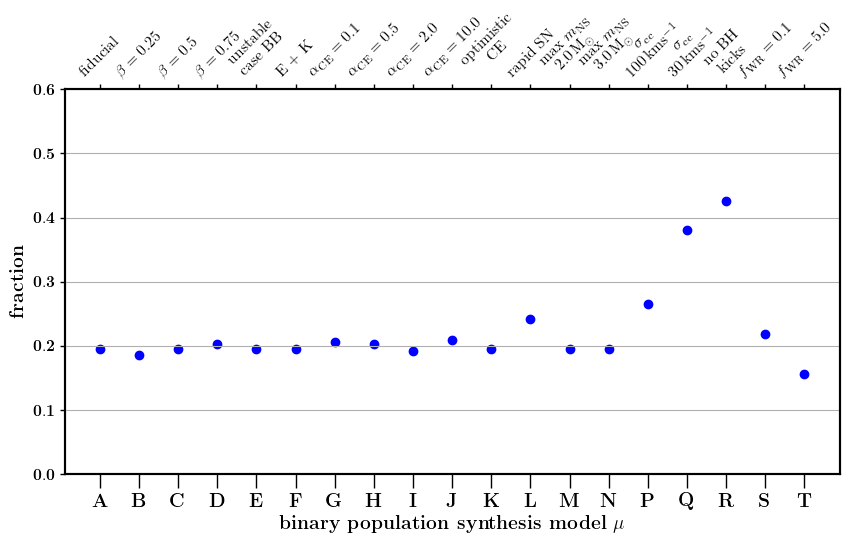

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), gridspec_kw={'hspace': 0.1})

ax = plot_f_SN1(rates, ax)